Analisis de datos.
Informacion del dataset. Presentacion de primeras filas.Datos estadisticos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dataset_flujo_vehicular.csv') 

print(data.info())   

print(data.head()) 

print(data.describe()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186412 entries, 0 to 186411
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CODIGO_LOCACION  186412 non-null  object 
 1   HORA             186412 non-null  object 
 2   CANTIDAD         186412 non-null  int64  
 3   SENTIDO          186412 non-null  object 
 4   LATITUD          186412 non-null  float64
 5   LONGITUD         186412 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.5+ MB
None
  CODIGO_LOCACION                 HORA  CANTIDAD  SENTIDO    LATITUD  \
0       48Q3CJ00+  2020-03-31 15:00:00       729  interna -34.588796   
1       48Q3CJ00+  2020-03-31 15:00:00       447   egreso -34.588796   
2       48Q39G00+  2020-03-31 15:00:00       175  interna -34.633299   
3       48Q39G00+  2020-03-31 15:00:00      1186   egreso -34.633299   
4       48Q3CH00+  2020-03-31 15:00:00        35   egreso -34.579632   

    LONGITUD  

Limpieza de datos.
Podemos observar que no se encuentran ni valores duplicados ni valores nulos a lo largo del conjunto de datos.

In [2]:
cantidad_filas = len(data)

print(f"Cantidad de filas: {cantidad_filas}")

print(f"valores nulos en cada columna: \n{data.isnull().sum()}")

print(f"filas duplicadas: {data.duplicated().sum()}")

Cantidad de filas: 186412
valores nulos en cada columna: 
CODIGO_LOCACION    0
HORA               0
CANTIDAD           0
SENTIDO            0
LATITUD            0
LONGITUD           0
dtype: int64
filas duplicadas: 0


Calculo de valores atipicos.

In [3]:
# calcular cuartiles y rango intercuartil 

Q1 = data['CANTIDAD'].quantile(0.25)

Q3 = data['CANTIDAD'].quantile(0.75)
IQR = Q3 - Q1

# identificacion de valores atipicos

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

atypicall = data[(data['CANTIDAD'] < limite_inferior) | (data['CANTIDAD'] > limite_superior)]

cantidad_filas2 = len(atypicall)

print(f"filas con datos atipicos: {cantidad_filas2}")

print(f"Los valores atipicos son: \n{atypicall}")


filas con datos atipicos: 10123
Los valores atipicos son: 
       CODIGO_LOCACION                 HORA  CANTIDAD  SENTIDO    LATITUD  \
2941         48Q39G00+  2020-03-19 22:00:00      7262   egreso -34.633299   
2952         48Q39G00+  2020-03-19 21:00:00      7141   egreso -34.633299   
2972         48Q39G00+  2020-03-19 20:00:00      7142   egreso -34.633299   
2974         48Q39G00+  2020-03-19 19:00:00      7191  ingreso -34.633299   
2981         48Q39J00+  2020-03-19 19:00:00      7947  interna -34.608550   
...                ...                  ...       ...      ...        ...   
186389       48Q39G00+  2022-01-26 09:00:00      7698  ingreso -34.633299   
186392       48Q39G00+  2022-01-26 10:00:00      7343  ingreso -34.633299   
186401       48Q39G00+  2022-01-26 13:00:00      7248  ingreso -34.633299   
186406       48Q39G00+  2022-01-26 15:00:00      7618   egreso -34.633299   
186409       48Q39G00+  2022-01-26 16:00:00      7870   egreso -34.633299   

         LONGITU

Imputar los valores atipicos con la mediana. Asi tenemos un cambio en el dataset llamado data2. 
Luego de actualizar la dataset realizo un histograma con la distribucion de la frecuencia de los datos de CANTIDAD.

Número de outliers restantes: 0
datos actualizados: 
       CODIGO_LOCACION                 HORA  CANTIDAD  SENTIDO    LATITUD  \
0            48Q3CJ00+  2020-03-31 15:00:00     729.0  interna -34.588796   
1            48Q3CJ00+  2020-03-31 15:00:00     447.0   egreso -34.588796   
2            48Q39G00+  2020-03-31 15:00:00     175.0  interna -34.633299   
3            48Q39G00+  2020-03-31 15:00:00    1186.0   egreso -34.633299   
4            48Q3CH00+  2020-03-31 15:00:00      35.0   egreso -34.579632   
...                ...                  ...       ...      ...        ...   
186407       48Q39G00+  2022-01-26 15:00:00    6542.0  ingreso -34.633299   
186408       48Q39G00+  2022-01-26 15:00:00    1168.0  interna -34.633299   
186409       48Q39G00+  2022-01-26 16:00:00    1193.0   egreso -34.633299   
186410       48Q39G00+  2022-01-26 16:00:00    5991.0  ingreso -34.633299   
186411       48Q39G00+  2022-01-26 16:00:00    1028.0  interna -34.633299   

         LONGITUD  
0 

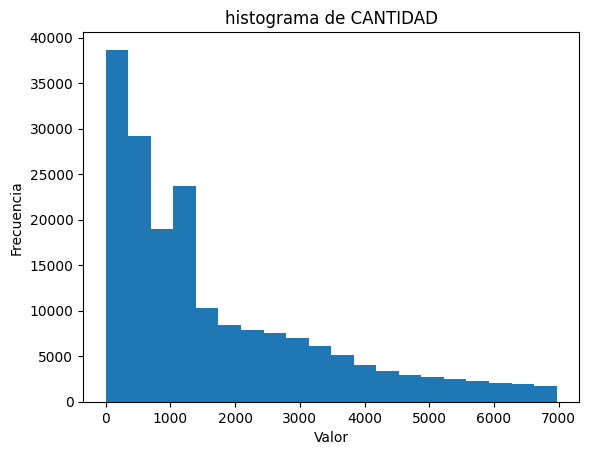

In [4]:
# imputar outliers con la mediana

import numpy as np

mediana = data['CANTIDAD'].median()

data['CANTIDAD'] = np.where((data['CANTIDAD'] < limite_inferior) | (data['CANTIDAD'] > limite_superior), mediana, data['CANTIDAD'])

data2 = data

# verificar el numero de outliers restantes

outliers = data2[(data2['CANTIDAD'] < limite_inferior) | (data2['CANTIDAD'] > limite_superior)]

print(f'Número de outliers restantes: {outliers.shape[0]}')

print(f'datos actualizados: \n{data2}')

datagraph = data2['CANTIDAD']

import matplotlib.pyplot as plt

plt.hist(datagraph,bins=20)
plt.title('histograma de CANTIDAD')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Verificar validez de longitud y latitud. 
Ademas, verificamos la normalidad de la columna de SENTIDO 

In [5]:
# verificar la latitud y la longitud
invalid_latitudes = data[(data['LATITUD'] < -90) | (data['LATITUD'] > 90)]
invalid_longitudes = data[(data['LONGITUD'] < -180) | (data['LONGITUD'] > 180)]
print(f"Número de latitudes inválidas: {len(invalid_latitudes)}")
print(f"Número de longitudes inválidas: {len(invalid_longitudes)}")

# normalizar la columna SENTIDO
data['SENTIDO'] = data['SENTIDO'].str.lower()

# verificar los valores únicos de columna SENTIDO
print(f"valores únicos de SENTIDO: {data['SENTIDO'].unique()}")

Número de latitudes inválidas: 0
Número de longitudes inválidas: 0
valores únicos de SENTIDO: ['interna' 'egreso' 'ingreso']


Transformacion de los datos para el posterior analisis. 
Convierto a datetime la columna HORA, y separo cada columna.
Luego, calculo la densidad de trafico= cantidad/(latitud-longitud).
Finalmente categorizo con 0 1 2 la columna de SENTIDO

In [6]:
data2=data
# nuevas componentes de la columna HORA
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour

# columnas separadas
print(data2['hora'].head(), print(data2['dia'].head() ), print(data2['mes'].head() ),  data2['año'].head() )


# densidad de tráfico (cantidad dividida por diferencia absoluta de coordenadas)
data2['densidad'] = data2['CANTIDAD'] / (data2['LATITUD'] - data2['LONGITUD']).abs()

# diccionario para codificar las categorías
codificacion = {'interna': 0, 'ingreso': 1, 'egreso': 2}
data2['SENTIDO_CODIFICADO'] = data2['SENTIDO'].map(codificacion)
print(data2[['SENTIDO', 'SENTIDO_CODIFICADO']].head())


0    31
1    31
2    31
3    31
4    31
Name: dia, dtype: int32
0    3
1    3
2    3
3    3
4    3
Name: mes, dtype: int32
0    15
1    15
2    15
3    15
4    15
Name: hora, dtype: int32 None None 0    2020
1    2020
2    2020
3    2020
4    2020
Name: año, dtype: int32
   SENTIDO  SENTIDO_CODIFICADO
0  interna                   0
1   egreso                   2
2  interna                   0
3   egreso                   2
4   egreso                   2


In [7]:
#saco el dia inicial y final de la columna HORA
min_dia=data2['dia'][(data2['año']==2020) & (data2['mes']==3)].min()

print(f"el primer dia es {min_dia} de marzo de 2020")

max_dia=data2['dia'][(data2['año']==2022) & (data2['mes']==3)].max()

print(f"el ultimo dia es {max_dia} de marzo de 2023")

el primer dia es 2 de marzo de 2020
el ultimo dia es 12 de marzo de 2023


Con el codigo anterior, puedo saber que el dataset abarca un periodo temporal desde el 2/3/2020 hasta 12/3/2020
Después de transformar los datos, realizo un análisis de datos agrupados para obtener relaciones sobre los distintos datos:

Analisis de CANTIDAD respecto del tiempo, utilizo la funcion sum() para ver el impacto global de los datos

suma de cantidad por hora: 
hora
0    5715293.0
1    4131565.0
2    2905132.0
3    2285799.0
4    2844152.0
Name: CANTIDAD, dtype: float64


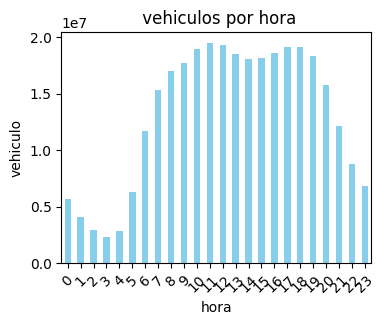

In [8]:
import matplotlib.pyplot as plt
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['hora'] = data2['HORA'].dt.hour


# cantidad por hora
cantidadpor_hora = data2.groupby('hora')['CANTIDAD'].sum()
print(f"suma de cantidad por hora: \n{cantidadpor_hora.head()}")
cantidadpor_hora.plot(kind='bar', color='skyblue', figsize=(4, 3))

# la grafica
plt.title(' vehiculos por hora')
plt.xlabel('hora')
plt.ylabel('vehiculo')
plt.xticks(rotation=45)
plt.show()



El grafico que relaciona cantidad de vehiculo por hora nos muestra que hay en general una mayor cantidad de vehiculos en las horas pico de CABA dadas de 7 a 11 y de 16 a 20
Esto lo podemos verificar fijandonos cuantos vehiculos hay por fuera y por dentro de esas horas picos en el año 2021.

In [9]:
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour

horapico = data2['CANTIDAD'][(data2['hora'] >= 7 )& (data2['hora'] <= 11) &(data2['año'] == 2021)].sum()

print(f"hora pico 2021: {horapico}")

hora_nopico= data2['CANTIDAD'][(data2['hora'] >= 13 )& (data2['hora'] <= 15) &(data2['año'] == 2021)].sum()

print(f"hora no pico 2021: {hora_nopico}")

madrugada= data2['CANTIDAD'][(data2['hora'] >= 0 )& (data2['hora'] <= 6) &(data2['año'] == 2021)].sum()

print(f"a la madrugada circulan: {madrugada}")

print("la conclusion es que en hora pico hay mas circulacion de vehiculos como dicen los graficos y los datos")

hora pico 2021: 44703318.0
hora no pico 2021: 27586541.0
a la madrugada circulan: 18169754.0
la conclusion es que en hora pico hay mas circulacion de vehiculos como dicen los graficos y los datos


 suma por dia: 
dia
1     9516905.0
2    10258289.0
3    10850595.0
4    10907769.0
5    10643553.0
Name: CANTIDAD, dtype: float64


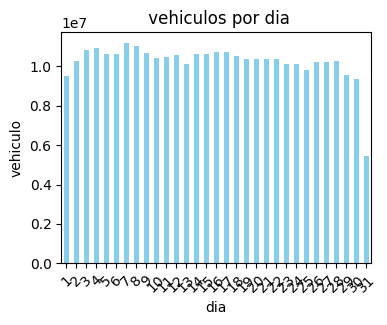

In [10]:
import matplotlib.pyplot as plt

#conversion de HORA
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour


# cantidad por dia
cantidadpor_dia = data2.groupby('dia')['CANTIDAD'].sum()
print(f" suma por dia: \n{cantidadpor_dia.head()}")
cantidadpor_dia.plot(kind='bar', color='skyblue', figsize=(4, 3))

# grafica
plt.title(' vehiculos por dia')
plt.xlabel('dia')
plt.ylabel('vehiculo')
plt.xticks(rotation=45)
plt.show()

En este caso los datos se distribuyen de manera casi uniforme aunque en los primeros dias se ve una tendencia creciente luego se mantienen hasta que en el dia 31 se nota una baja notable del flujo vehicular. El comportamiento de los datos se puede dar por el hecho de que la gente a fin de mes no quiere gastar de mas en combustible lo que implica el transito vehicular.
Podemos verificarlo con el siguiente codigo.

In [11]:
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour

dias_muchos = data2['CANTIDAD'][(data2['dia'] >= 7 ) & (data2['dia'] <= 15) & (data2['año'] == 2021)].sum()

print(f" entre 7 y 15 se ve esta cantidad {dias_muchos}")

dias_pocos= data2['CANTIDAD'][(data2['dia'] == 31)&(data2['año'] == 2021)].sum()
print(f" en el dia 31 se ve esta cantidad {dias_pocos}")

{dias_pocos<dias_muchos}
print(f"se verifica lo de la grafica donde hay poco trafico en el dia 31 {dias_pocos<dias_muchos}")

 entre 7 y 15 se ve esta cantidad 47984273.0
 en el dia 31 se ve esta cantidad 2829764.0
se verifica lo de la grafica donde hay poco trafico en el dia 31 True


cantidad por mes: 
mes
1    27810439.0
2    26654743.0
3    33013161.0
4    23121481.0
5    23978473.0
Name: CANTIDAD, dtype: float64


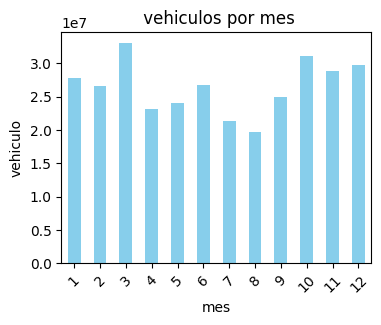

In [12]:
import matplotlib.pyplot as plt

#conversion de HORA
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour


# cantidad por mes
cantidadpor_mes = data2.groupby('mes')['CANTIDAD'].sum()
print(f"cantidad por mes: \n{cantidadpor_mes.head()}")
cantidadpor_mes.plot(kind='bar', color='skyblue', figsize=(4, 3))

# grafica
plt.title(' vehiculos por mes')
plt.xlabel('mes')
plt.ylabel('vehiculo')
plt.xticks(rotation=45)
plt.show()

Se ve una alta concentracion en los meses 3, 10, 11, 12, y puede deberse a que junto al mes 1 y 2 es el periodo donde es temporada de vacacionar.
veremos que en 3 tenemos mucho flujo y en 8 no

In [13]:
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['año'] = data2['HORA'].dt.year
data2['mes'] = data2['HORA'].dt.month
data2['dia'] = data2['HORA'].dt.day
data2['hora'] = data2['HORA'].dt.hour

mes3 = data2['CANTIDAD'][(data2['mes'] == 3) & (data2['año'] == 2021)].sum()

print(f" alta concentracion: {mes3}")

mes8= data2['CANTIDAD'][(data2['mes'] == 8 ) &(data2['año'] == 2021)].sum()
print(f"menor concentracion:  {mes8}")

print(f"se verifica que en 3 hay mas flujo que en 8 {mes3>mes8}")


 alta concentracion: 15970831.0
menor concentracion:  8210385.0
se verifica que en 3 hay mas flujo que en 8 True


No se puede comparar por anio porque solo tengo 2021 completo pero podemos comparar entre fechas iguales en mismo rango de hora 

In [14]:
# comparacion de 2 de marzo en rango de 7 a 20
cant1 = data2['CANTIDAD'][(data2['hora'] >= 7 )& (data2['hora'] <= 20) & (data2['año'] == 2020)&(data2['dia'] ==2) &(data2['mes']== 3)].sum()

print(f"cantidad en 2/3/2020: {cant1}")

cant2 = data2['CANTIDAD'][(data2['hora'] >= 7) & (data2['hora'] <= 20) & (data2['año'] == 2021)&(data2['dia'] ==2) &(data2['mes']== 3)].sum()

print(f"cantidad en 2/3/2021: {cant2}")

cant3 = data2['CANTIDAD'][(data2['hora'] >= 7 )& (data2['hora'] <= 20) & (data2['año'] == 2022)&(data2['dia'] ==2) &(data2['mes']== 3)].sum()

print(f"cantidad en 2/3/2022: {cant3}")

cantidad en 2/3/2020: 302602.0
cantidad en 2/3/2021: 399430.0
cantidad en 2/3/2022: 429236.0


se observa que hay trafico vehicular en 2022 aun sabiendo que la pandemia inicio en 20/03/2020
no tengo ese dato en 2022. pero podemos decir que el flujo aumento un 41.9% respecto a los datos de 2020 en este caso

In [15]:

# tabla dinámica
tabla_dinamica = data2.pivot_table(values='CANTIDAD', index='HORA', columns='SENTIDO', aggfunc='sum', fill_value=0)
print(f" la tabla dinamica: \n{tabla_dinamica}")

# promedio por 'SENTIDO'
promedio_por_sentido = data2. pivot_table(values='CANTIDAD', index='SENTIDO', aggfunc='mean')
print(f" el promedio de datos por sentido: \n{promedio_por_sentido}")
# filtro por tipo de dato -> 
egreso_data = data2['SENTIDO'] == 'egreso'
ingreso_data= data2['SENTIDO'] == 'ingreso'
interna_data= data2['SENTIDO'] == 'interna'
print(egreso_data.head())
print(ingreso_data.head())
print(interna_data.head())

 la tabla dinamica: 
SENTIDO              egreso  ingreso  interna
HORA                                         
2020-03-02 00:00:00  5048.0   4968.0   7299.0
2020-03-02 01:00:00  3061.0   2736.0   4732.0
2020-03-02 02:00:00  1938.0   1690.0   2965.0
2020-03-02 03:00:00  1712.0   1581.0   2383.0
2020-03-02 04:00:00  2320.0   2276.0   2605.0
...                     ...      ...      ...
2022-03-12 16:00:00  8561.0   7357.0  15820.0
2022-03-12 17:00:00  8030.0   7205.0  16037.0
2022-03-12 18:00:00  7971.0   8129.0  17169.0
2022-03-12 19:00:00  8799.0   9051.0  15454.0
2022-03-12 20:00:00  8902.0   9962.0  16036.0

[17694 rows x 3 columns]
 el promedio de datos por sentido: 
            CANTIDAD
SENTIDO             
egreso   1508.289006
ingreso  2182.533343
interna  1632.863336
0    False
1     True
2    False
3     True
4     True
Name: SENTIDO, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: SENTIDO, dtype: bool
0     True
1    False
2     True
3    False
4    F

Ahora, una analisis de la densidad de trafico en funcion de la hora.

densidad por hora: 
hora
0    5715293.0
1    4131565.0
2    2905132.0
3    2285799.0
4    2844152.0
Name: CANTIDAD, dtype: float64


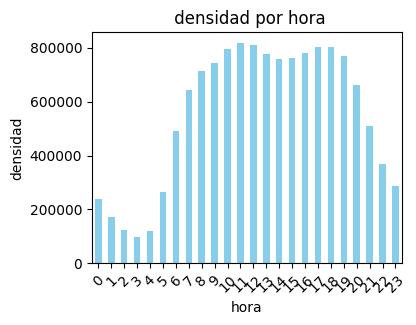

In [16]:



import matplotlib.pyplot as plt
data2['HORA'] = pd.to_datetime(data2['HORA'])
data2['hora'] = data2['HORA'].dt.hour

# densidad de tráfico (cantidad dividida por diferencia absoluta de coordenadas)
data2['densidad'] = data2['CANTIDAD'] / (data2['LATITUD'] - data2['LONGITUD']).abs()

# cantidad por hora
densidadpor_hora = data2.groupby('hora')['densidad'].sum()
print(f"densidad por hora: \n{cantidadpor_hora.head()}")
densidadpor_hora.plot(kind='bar', color='skyblue', figsize=(4, 3))

# la grafica
plt.title(' densidad por hora')
plt.xlabel('hora')
plt.ylabel('densidad')
plt.xticks(rotation=45)
plt.show()




Vemos que existe alta densidad vehicular en la hora pico ya mencionada. Entonces es ahi donde hay mas flujo vehicular en determinadas latitudes y longitudes.

Ahora relacionare las columnas de SENTIDO Y CANTIDAD ya que podemos ver para donde se dirigen 

sentido por cantidad: 
SENTIDO_CODIFICADO
0    160903986.0
1     76781523.0
2     79473256.0
Name: CANTIDAD, dtype: float64


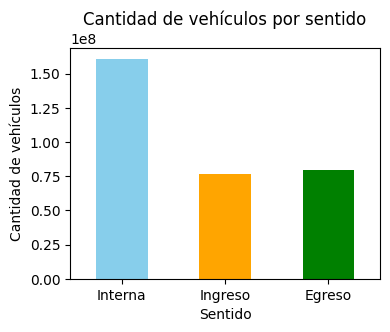

In [17]:
import matplotlib.pyplot as plt
# diccionario para codificar las categorías
codificacion = {'interna': 0, 'ingreso': 1, 'egreso': 2}
data2['SENTIDO_CODIFICADO'] = data2['SENTIDO'].map(codificacion)
analisis_sentido = data2.groupby('SENTIDO_CODIFICADO')['CANTIDAD'].sum()
print(f"sentido por cantidad: \n{analisis_sentido}")

plt.figure(figsize=(4,3))  
analisis_sentido.plot(kind='bar', color=['skyblue', 'orange', 'green'])  # Colores para cada sentido

# Personalizar el gráfico
plt.title('Cantidad de vehículos por sentido')  # Título
plt.xlabel('Sentido')  # Etiqueta del eje X
plt.ylabel('Cantidad de vehículos')  # Etiqueta del eje Y
plt.xticks(ticks=[0, 1, 2], labels=['Interna', 'Ingreso', 'Egreso'], rotation=0)  # Etiquetas para los sentidos
plt.show()

El flujo se inclina mayoritariamente por el sentido "interna".

A continuacion, un grafico de como se distribuyen los vehiculos de acuerdo a los datos de longitud y latitud

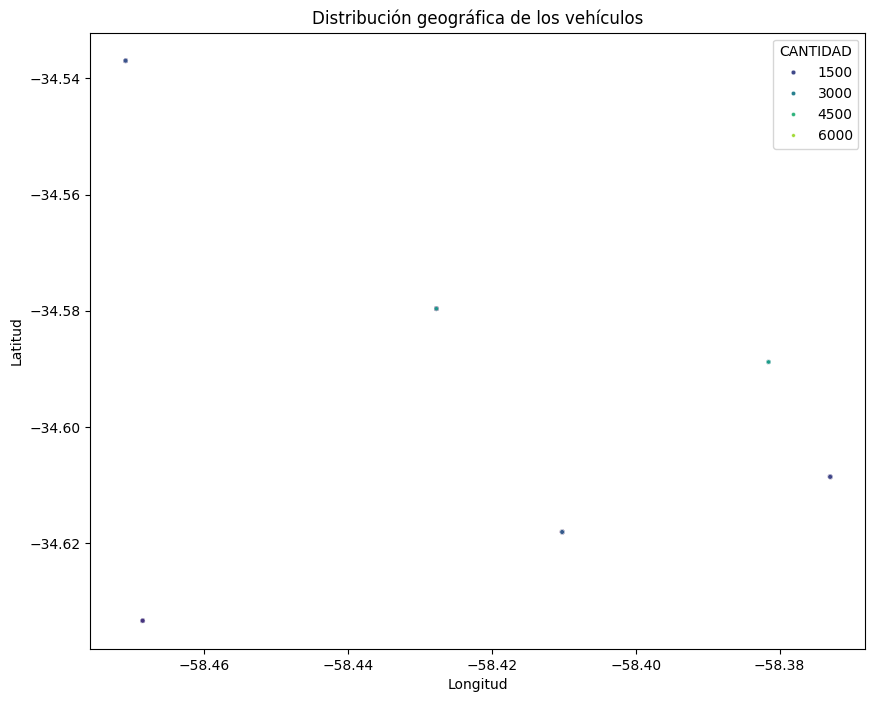

  CODIGO_LOCACION                HORA  CANTIDAD  SENTIDO    LATITUD  \
0       48Q3CJ00+ 2020-03-31 15:00:00     729.0  interna -34.588796   
1       48Q3CJ00+ 2020-03-31 15:00:00     447.0   egreso -34.588796   
2       48Q39G00+ 2020-03-31 15:00:00     175.0  interna -34.633299   
3       48Q39G00+ 2020-03-31 15:00:00    1186.0   egreso -34.633299   
4       48Q3CH00+ 2020-03-31 15:00:00      35.0   egreso -34.579632   

    LONGITUD   año  mes  dia  hora   densidad  SENTIDO_CODIFICADO  
0 -58.381520  2020    3   31    15  30.639619                   0  
1 -58.381520  2020    3   31    15  18.787256                   2  
2 -58.468594  2020    3   31    15   7.342053                   0  
3 -58.468594  2020    3   31    15  49.758142                   2  
4 -58.427733  2020    3   31    15   1.467622                   2  


In [ ]:
#grafica de ubicacion de los vehiculos
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(data=data2, x='LONGITUD', y='LATITUD', hue='CANTIDAD', palette='viridis', size='CANTIDAD', sizes=(12,6))

plt.title('Distribución geográfica de los vehículos')

plt.xlabel('Longitud')

plt.ylabel('Latitud')

plt.show()


Ahora propongo un modelo lineal para predecir la variabilidad de la variable CANTIDAD

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# variables categóricas a numéricas
label_encoders = {}
for column in ['CODIGO_LOCACION', 'HORA', 'SENTIDO']:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le 
    
X = data2[['CODIGO_LOCACION', 'HORA', 'SENTIDO', 'LATITUD', 'LONGITUD']]
y = data2['CANTIDAD']

# dividir los datos en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear el modelo
model = LinearRegression()

# entrenarlo
model.fit(X_train, y_train)

# hace predicciones 
y_pred = model.predict(X_test)

# evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2505989.22
R^2 Score: 0.08


El R² score es muy bajo por lo que el modelo no estaria capturando la relacion entre las variables independientes y la dependiente, de modo que la variable CANTIDAD no puede ser explicada en cuanto a su variabilidad.
El MSE indica una alta diferencia cuadratica entre las predicciones y los valores reales por lo que el modelo no esta haciendo predicciones muy precisas.

Propongo un modelo predictivo con un arbol de decision

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Convertir variables categóricas a numéricas
label_encoders = {}
for column in ['CODIGO_LOCACION', 'HORA', 'SENTIDO']:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le  # Guardar el encoder si se necesita más tarde

# Definir las características (X) y la variable objetivo (y)
X = data2[['CODIGO_LOCACION', 'HORA', 'SENTIDO', 'LATITUD', 'LONGITUD']]
y = data2['CANTIDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 807726.16
R^2 Score: 0.70


Conclusion: como el R^2 score esta cerca de 1 entonces el modelo explica en un 70% la variabilidad de la variable cantidad